In [20]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from epiweeks import Week
import datetime
from datetime import timedelta
import matplotlib.dates as mdates

bin_path = '../../functions'
if bin_path not in sys.path:
    sys.path.insert(1, '../../functions')
import hmm_inference

### Calculate summarized Ne without the $10^5$ bound

In [30]:
variant_param_folders = ['../../data/lineages/pre_B-1-177/microreact/',
                         '../../data/lineages/B-1-177/B-1-177|2021-02-22|694.5/',
                         '../../data/lineages/alpha/alpha|2021-06-20|61.5/',
                         '../../data/lineages/delta/delta|2022-01-25|49.5+58.5/']
for variant_param_folder in variant_param_folders:
    raw_filename = variant_param_folder + '/is_pillar_2/England/inference_results/raw.csv'
    output_folder = variant_param_folder + '/is_pillar_2/England/inference_results/'
    output_filename = 'summary_keep_high_Ne_runs.csv'
    hmm_inference.summarize_results_keep_high_Ne_runs(raw_filename, output_folder, output_filename)

/global/homes/q/qinqinyu/.conda/envs/sars-cov-2_genetic_drift/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/global/homes/q/qinqinyu/.conda/envs/sars-cov-2_genetic_drift/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1562: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/global/u2/q/qinqinyu/projects/sars-cov-2_genetic_drift/analysis_scripts/model_checking/../../functions/hmm_inference.py:405: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(pd.DataFrame({'Epiweek':[epiweek], \
/global/homes/q/qinqinyu/.conda/envs/sars-cov-2_genetic_drift/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/global/homes/q/qinqinyu/.con

### Plot results

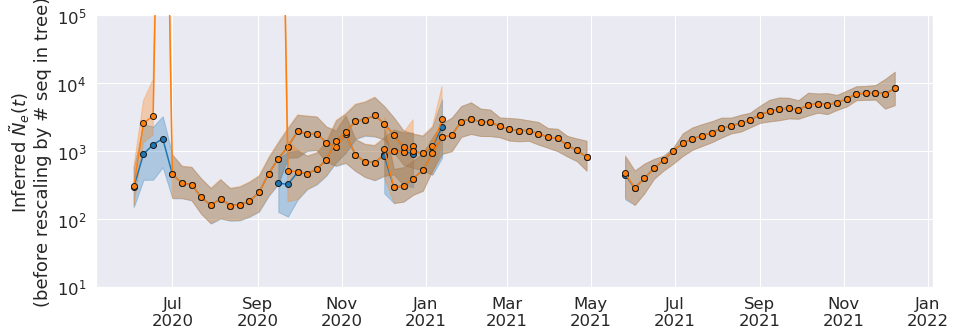

In [83]:
fig, ax = plt.subplots(1,1, figsize = (15,5))

for variant_param_folder in variant_param_folders:
    summary = pd.read_csv(variant_param_folder + '/is_pillar_2/England/inference_results/summary.csv', index_col = 0)
    summary_high_Ne = pd.read_csv(variant_param_folder + '/is_pillar_2/England/inference_results/summary_keep_high_Ne_runs.csv', index_col = 0)
    
    epiweeks = summary['Epiweek']
    dates = []
    for w in epiweeks:
        w = int(np.floor(float(w)))
        if w<=53:
            week = Week(2020, w)
        elif (w>53)&(w<=105):
            week = Week(2021, w-53)
        else:
            week = Week(2022, w-53-52)
        dates.append(week.startdate()+timedelta(days=3))
    dates = np.array(dates)

    summary['date'] = dates
    summary_high_Ne['date'] = dates

    p = ax.plot(summary['date'], summary['Netau_HMM_median'], zorder = 10, color = 'tab:blue', marker = 'o', markeredgecolor = 'k')#, capsize = 5)
    ax.fill_between(summary['date'], summary['Netau_HMM_95%_ci_lower'], summary['Netau_HMM_95%_ci_upper'], color=p[0].get_color(), alpha=0.3)
    p = ax.plot(summary_high_Ne['date'], summary_high_Ne['Netau_HMM_median'], zorder = 10, color = 'tab:orange', marker = 'o', markeredgecolor = 'k')#, capsize = 5)
    ax.fill_between(summary_high_Ne['date'], summary_high_Ne['Netau_HMM_95%_ci_lower'], summary_high_Ne['Netau_HMM_95%_ci_upper'], color=p[0].get_color(), alpha=0.3)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.ylim([10**1, 10**5])
plt.ylabel('Inferred $\\tilde{N}_e(t)$ \n(before rescaling by # seq in tree)')
ax.set_yscale('log')

### Look at the distribution of raw inferred Ne values

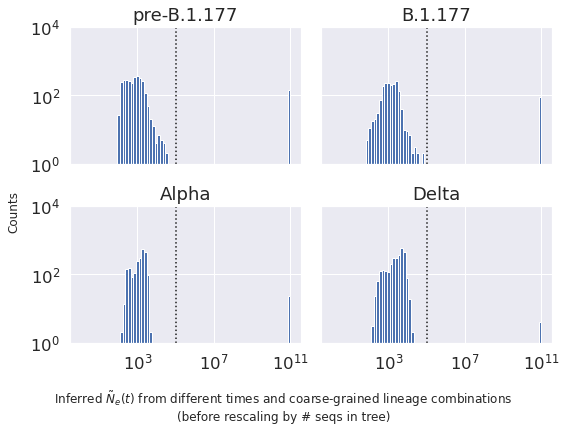

In [88]:
variants = ['pre-B.1.177', 'B.1.177', 'Alpha', 'Delta']
i=0
fig, ax = plt.subplots(2,2,figsize = (8,6),sharex = True, sharey = True)
for variant_param_folder in variant_param_folders:
    raw = pd.read_csv(variant_param_folder + '/is_pillar_2/England/inference_results/raw.csv', index_col = 0)
    ax[int(np.floor(i/2)),i%2].hist(raw['Netau_HMM'], np.logspace(0,11,80))
    ax[int(np.floor(i/2)),i%2].plot([10**5,10**5],[10**0, 10**4],'k:')
    ax[int(np.floor(i/2)),i%2].set_xscale('log')
    ax[int(np.floor(i/2)),i%2].set_yscale('log')
    ax[int(np.floor(i/2)),i%2].set_title(variants[i])
    ax[int(np.floor(i/2)),i%2].set_ylim([10**0, 10**4])
    i+=1
fig.supxlabel('Inferred $\\tilde{N}_e(t)$ from different times and coarse-grained lineage combinations\n(before rescaling by # seqs in tree)')
fig.supylabel('Counts')
plt.tight_layout()
plt.savefig('../../figures/figure_outputs/full_distribution_inferred_Ne.png', dpi = 300)
plt.savefig('../../figures/figure_outputs/full_distribution_inferred_Ne.pdf')
plt.show()